<a href="https://colab.research.google.com/github/armandres/Ejercicio_diplomado/blob/main/2604_Modelos_Nutriologos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NOTA: El ejercicio en este notebook no esta completo. Andrés Aragón Martínez
En el afán de seguir el ejercicio sin abrumar con todas las variables, se seleccioanron algunas y se siguieron las instrucciones.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/02%20An%C3%A1lisis%20Estad%C3%ADstico/notebooks/exercises/Ejercicio_Nutriologos.ipynb)

# Ejercicio: NUTRIOLOGOS

Este ejercicio tiene como objetivo simular y analizar datos relacionados con la salud y el estilo de vida de individuos, con el fin de explorar patrones, relaciones y posibles predictores de enfermedades crónicas. Se generan datos sintéticos utilizando distribuciones estadísticas y lógica programática para representar una amplia gama de características relevantes para la salud, como edad, peso, hábitos alimenticios, historial médico familiar, niveles de actividad física, entre otros.

In [ ]:
# Data manipulation libraries
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# Web scraping
from bs4 import BeautifulSoup

# Establecer la cantidad de datos a generar
cantidad_datos = 1000

In [ ]:
# Definir funciones para generar datos simulados
def generar_edad():
    return np.random.randint(18, 80, cantidad_datos)

def generar_altura():
    # Distribución normal con media de 170 cm y desviación estándar de 10 cm
    return np.random.normal(170, 10, cantidad_datos)

def generar_historial_medico_familiar():
    # Simulación de historial médico familiar
    enfermedades = ['A', 'B', 'C', 'D']
    return [', '.join(np.random.choice(enfermedades, np.random.randint(0, len(enfermedades)), replace=False)) for _ in range(cantidad_datos)]

def generar_enfermedades_cronicas():
    enfermedades = ['Dia', 'Hiper', 'Cán']
    return [', '.join(np.random.choice(enfermedades, np.random.randint(0, len(enfermedades)), replace=False)) for _ in range(cantidad_datos)]


In [ ]:
edad=generar_edad()
aLtura=generar_altura()
Historial_médico_familiar=generar_historial_medico_familiar()
Enfermedades_crónicas=generar_enfermedades_cronicas()


In [ ]:
# Generar datos simulados
edades = generar_edad()
data = {
    'Edad': generar_edad(),
    'Altura (cm)': generar_altura(),
    'Historial médico familiar': generar_historial_medico_familiar(),
    'Enfermedades crónicas': generar_enfermedades_cronicas()
}

df = pd.DataFrame(data)

In [ ]:
df

,Edad,Altura (cm),Historial médico familiar,Enfermedades crónicas
0,48,166.219470,"B, A, D",
1,48,172.891224,"D, A",Cán
2,19,162.245443,C,"Dia, Cán"
3,38,167.556048,"B, C","Cán, Hiper"
4,50,163.373034,"C, A, D",
...,...,...,...,...
995,67,162.561581,,"Hiper, Dia"
996,76,164.309623,A,"Cán, Hiper"
997,62,169.030535,"A, D, C",Dia
998,70,147.511594,B,Cán


In [ ]:
df.dtypes

Edad                           int64
Altura (cm)                  float64
Historial médico familiar     object
Enfermedades crónicas         object
dtype: object

In [ ]:
## Exploración de datos
df.describe()

,Edad,Altura (cm)
count,1000.000000,1000.000000
mean,47.565000,170.483259
std,18.157904,9.856806
min,18.000000,136.888869
25%,32.000000,163.891885
50%,48.000000,170.672907
75%,63.000000,177.134169
max,79.000000,198.547847


In [ ]:
df.columns

Index(['Edad', 'Altura (cm)', 'Historial médico familiar',
       'Enfermedades crónicas'],
      dtype='object')

In [ ]:
Columnas=['Edad', 'Altura (cm)', 'Historial médico familiar',
       'Enfermedades crónicas']

In [ ]:
## Creo un dataframe para analizar sólo con las variables (features) a analizar

df=df[Columnas]     # 10 variables

df.head(3)

,Edad,Altura (cm),Historial médico familiar,Enfermedades crónicas
0,55,160.943831,"D, B","Hiper, Cán"
1,66,183.134976,"D, A",Dia
2,76,159.318459,B,


In [ ]:
##Eliminar las columnas NO numéricas del df
df_numeric=df.select_dtypes(include=["float","int64"])

NameNumCol=df_numeric.columns
NameNumCol

Index(['Edad', 'Altura (cm)'], dtype='object')

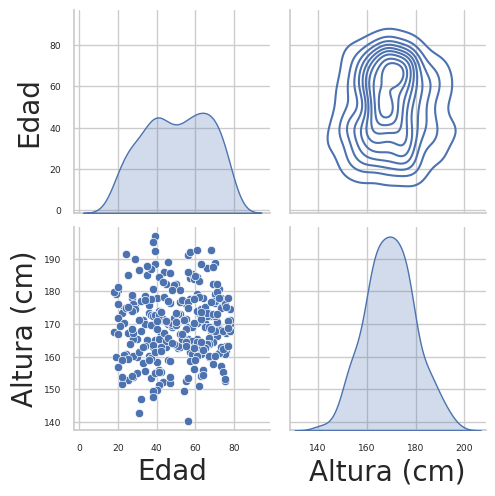

In [ ]:
## Exploración de datos: Generación de varios gráficos

def my_pairgrid(df,col_analisis):
     mpl.rcParams["axes.labelsize"] = 20
     g = sns.PairGrid(df, vars=col_analisis)
     g = g.map_diag(sns.kdeplot, fill=True)
     g = g.map_lower(sns.scatterplot)
     g = g.map_upper(sns.kdeplot)
     return(g)

##Eliminar las columnas NO numéricas
df_numeric=df.select_dtypes(include=["float","int64"])


_ = my_pairgrid(Muestra_df,NameNumCol)

In [ ]:
## Exploración de datos: Matriz de correlación

##Eliminar las columnas NO numéricas
df_numeric=df.select_dtypes(include=["float","int64"])

my_corr = df_numeric.corr()
my_corr.head(10)

,Edad,Altura (cm)
Edad,1.000000,-0.030087
Altura (cm),-0.030087,1.000000


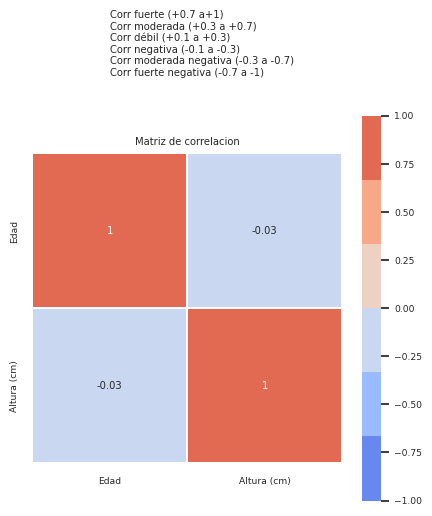

In [ ]:
## Exploración de datos: Heatmap de Matriz de correlación
## Exploración de datos: Matriz de correlación

my_corr =  df_numeric.corr()

plt.figure(figsize=(5,5))
sns.heatmap(my_corr, annot=True, square=True,
            cmap=sns.color_palette("coolwarm"),
            vmax=1,      #np.max(np.sort(my_corr.values)[:,-2]),
            vmin=-1,
           linewidths=0.3)
plt.title("Matriz de correlacion")
plt.text(0.5,-0.5, "Corr fuerte (+0.7 a+1)\nCorr moderada (+0.3 a +0.7)\nCorr débil (+0.1 a +0.3)\nCorr negativa (-0.1 a -0.3)\nCorr moderada negativa (-0.3 a -0.7)\nCorr fuerte negativa (-0.7 a -1)")
plt.show()


Modelo 1: RandomForestClassifier

In [ ]:
df.columns

Index(['Edad', 'Altura (cm)', 'Historial médico familiar',
       'Enfermedades crónicas'],
      dtype='object')

In [ ]:
df.head(3)

,Edad,Altura (cm),Historial médico familiar,Enfermedades crónicas
0,48,166.219470,"B, A, D",
1,48,172.891224,"D, A",Cán
2,19,162.245443,C,"Dia, Cán"


In [ ]:
df.loc[df['Enfermedades crónicas']=="",['Enfermedades crónicas']]="NaN"
df.loc[df['Historial médico familiar']=="",['Historial médico familiar']]="NaN"

In [ ]:
df.head(3)

,Edad,Altura (cm),Historial médico familiar,Enfermedades crónicas
0,48,166.219470,"B, A, D",NaN
1,48,172.891224,"D, A",Cán
2,19,162.245443,C,"Dia, Cán"


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder

## MODELO: Definir los componentes del modelo

## El modelo va a estimar el Peso en función de Edad, Altura, IMC

##        Xs => Variables independientes= Características o features (TODAS LAS COLUMNAS)
##        y  => Variable dependiente, variable objetivo o target (Enferm_Cronicas)

X = df.drop(columns=['Enfermedades crónicas'], axis=1).copy()    # Características (vars independientes)
y = df['Enfermedades crónicas'].copy()                   # Variable objetivo (dependiente)


In [ ]:
X.shape

(1000, 3)

In [ ]:
X.head(3)

,Edad,Altura (cm),Historial médico familiar
0,48,166.219470,"B, A, D"
1,48,172.891224,"D, A"
2,19,162.245443,C


In [ ]:
y.unique()

array(['NaN', 'Cán', 'Dia, Cán', 'Cán, Hiper', 'Dia, Hiper', 'Cán, Dia',
       'Hiper', 'Hiper, Dia', 'Hiper, Cán', 'Dia'], dtype=object)

In [ ]:
## MODELO: Identificar columnas con variables categóricas
categorical_cols = X.select_dtypes(include=['object']).columns
categorical_cols

Index(['Historial médico familiar'], dtype='object')

In [ ]:
## MODELO: Aplicar codificación one-hot a las variables categóricas
X_encoded = pd.get_dummies(X, columns=categorical_cols)
X_encoded

,Edad,Altura (cm),Historial médico familiar_A,"Historial médico familiar_A, B","Historial médico familiar_A, B, C","Historial médico familiar_A, B, D","Historial médico familiar_A, C","Historial médico familiar_A, C, B","Historial médico familiar_A, C, D","Historial médico familiar_A, D",...,"Historial médico familiar_D, A","Historial médico familiar_D, A, B","Historial médico familiar_D, A, C","Historial médico familiar_D, B","Historial médico familiar_D, B, A","Historial médico familiar_D, B, C","Historial médico familiar_D, C","Historial médico familiar_D, C, A","Historial médico familiar_D, C, B",Historial médico familiar_NaN
0,48,166.219470,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,48,172.891224,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,19,162.245443,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,38,167.556048,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,50,163.373034,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,67,162.561581,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
996,76,164.309623,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
997,62,169.030535,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
998,70,147.511594,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
y.unique()

array(['NaN', 'Cán', 'Dia, Cán', 'Cán, Hiper', 'Dia, Hiper', 'Cán, Dia',
       'Hiper', 'Hiper, Dia', 'Hiper, Cán', 'Dia'], dtype=object)

**Modelo:  RandomForestClassifier   Estima= Fuma 1=Si  0=no**


In [ ]:
## MODELO: Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=10)


In [ ]:
X_train.shape

(800, 43)

In [ ]:
## MODELO:  Inicializar el clasificador Random Forest y entrenar el modelo
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)    #en este modelo sólo se puede meter en y a variables categóricas
rf_classifier.fit(X_train, y_train)                                          ##Ajuste del modelo

RandomForestClassifier(random_state=42)

In [ ]:
## MODELO: Hacer predicciones en el conjunto de prueba
y_pred = rf_classifier.predict(X_test)

esperado=y_test     #serie pandas
pronostico=y_pred   #arreglo numpy


In [ ]:
## MODELO: Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.235


In [ ]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[ 3  1  0  1  1  1  3  1  2 14]
 [ 0  1  0  1  1  0  2  0  0 11]
 [ 1  2  3  1  1  0  0  1  0  3]
 [ 4  0  2  1  1  1  2  0  1 11]
 [ 1  0  0  0  1  0  2  0  0  6]
 [ 1  0  0  2  0  1  0  0  0  7]
 [ 1  1  0  0  0  1  0  0  1 11]
 [ 2  1  1  0  1  0  0  0  0 11]
 [ 1  0  1  1  0  0  1  1  0  3]
 [ 5  1  4  7  0  2  4  2  0 37]]


In [ ]:
y_train

188           NaN
194      Dia, Cán
225           Dia
580    Hiper, Dia
428           NaN
          ...    
320           Cán
527           NaN
996    Cán, Hiper
125      Dia, Cán
265    Hiper, Cán
Name: Enfermedades crónicas, Length: 800, dtype: object

In [ ]:
## Modelo XGBoost

from sklearn.preprocessing import LabelEncoder

#### Se requiere transformal la columna y con valores entre 0 y 23
# Codificar las etiquetas de clase
label_encoder = LabelEncoder()
label_encoder.fit(y)

# 2. Transformar ambos conjuntos de datos con el mismo LabelEncoder
y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


In [ ]:
!pip install xgboost

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## MODELO:  Inicializar el clasificador Random Forest y entrenar el modelo
clf_xgb=xgb.XGBClassifier() #objective="binary;logistic",missing=None, seed=42)
# Entrena el clasificador
clf_xgb.fit(X_train,
            y_train_encoded, #y_train,
            verbose=True,
            early_stopping_rounds=10,
            #eval_metric="aucpr",
            eval_set=[(X_test,y_test_encoded)]
            )


[0]	validation_0-mlogloss:2.22571
[1]	validation_0-mlogloss:2.19578
[2]	validation_0-mlogloss:2.18133
[3]	validation_0-mlogloss:2.18026
[4]	validation_0-mlogloss:2.19256
[5]	validation_0-mlogloss:2.21216
[6]	validation_0-mlogloss:2.21220
[7]	validation_0-mlogloss:2.22752
[8]	validation_0-mlogloss:2.24351
[9]	validation_0-mlogloss:2.26337
[10]	validation_0-mlogloss:2.27511
[11]	validation_0-mlogloss:2.28691
[12]	validation_0-mlogloss:2.30103
[13]	validation_0-mlogloss:2.31710


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
## MODELO: Hacer predicciones en el conjunto de prueba
y_pred = clf_xgb.predict(X_test)
y_pred[0:5]

array([9, 9, 9, 9, 9])

In [ ]:
y_test_original = label_encoder.inverse_transform(y_test_encoded)
y_pred_original = label_encoder.inverse_transform(y_pred)


esperado=y_test_original     #serie pandas
pronostico=y_pred_original   #arreglo numpy


In [ ]:
pronostico

array(['NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN',
       'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN',
       'NaN', 'NaN', 'NaN', 'Cán, Hiper', 'NaN', 'NaN', 'NaN', 'NaN',
       'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN',
       'NaN', 'NaN', 'NaN', 'Dia, Cán', 'NaN', 'NaN', 'NaN', 'NaN',
       'Hiper, Cán', 'NaN', 'Dia', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN',
       'Dia', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN',
       'NaN', 'NaN', 'NaN', 'NaN', 'Cán', 'Hiper', 'NaN', 'NaN', 'NaN',
       'NaN', 'Dia, Hiper', 'NaN', 'Cán', 'NaN', 'NaN', 'Hiper, Cán',
       'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Hiper, Cán',
       'Dia, Hiper', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN',
       'NaN', 'NaN', 'NaN', 'NaN', 'Hiper, Cán', 'NaN', 'NaN', 'NaN',
       'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN',
       'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'Cán, Hiper',
       'NaN', 'NaN',

In [ ]:
#y_test_encoded
#y_train_encoded

# Realiza predicciones en el conjunto de prueba
y_pred = clf_xgb.predict(X_test)

# Calcula la precisión del modelo
#accuracy = accuracy_score(y_test, y_pred)
accuracy = accuracy_score(y_test_encoded, y_pred)

print("Precisión del modelo:", accuracy)

Precisión del modelo: 0.255


In [ ]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_encoded, y_pred))


Confusion Matrix:
[[ 0  0  0  0  0  0  0  2  1 24]
 [ 0  0  0  0  0  0  0  0  0 16]
 [ 2  0  0  0  0  1  0  0  0  9]
 [ 1  0  1  0  0  0  0  0  0 21]
 [ 0  0  0  0  0  0  1  0  0  9]
 [ 0  0  0  0  0  0  0  0  0 11]
 [ 0  0  0  0  0  1  0  0  0 14]
 [ 0  0  0  0  0  1  0  0  0 15]
 [ 0  0  0  0  1  0  0  0  0  7]
 [ 1  0  2  2  0  1  2  3  0 51]]
